# BEST PLACE TO BUILD A PARK

## Team Rangers 

### Intro
 Using the datasets provided by he WPRDC, we narrowed down the best place to build a park in Pittsburgh.
        
 * The Quality of the air
 * Park Data
 * Arrests

 Air Quality data is included because parks are places where people are supposed to have fun, and when you go to a park, you're usually there for a long time, and you wouldn't want people having problems with their breathing because of the air quality in the area. For air quality, it's best to find which places have good air qualities, and pick based on those areas. Park outline data would help us tremendously becaues it shows us how big each park is, and where parks are already built in the cities. You wouldn't want places to have multiple parks in the same area because it's a waste of space, and a waste of money. Arrest data helps us because it shows us which areas don't have a considerable amount of danger around them. This is important especially because you wouldn't want your park to have a bad rep in any means. Also if specific things do happen in that area, you would want preventative measures in place, to ensure that no danger would happen at or around the park.

### The Metric

We figured out our metrics by looking at what listed above, and I can just show you what I mean.

### Air Quality

For Air quality, it was a lot of researching into this on the website, and the reason is because when you think of air quality, you think it'll just give you one number and say good, bad, or whatever. No that is not the case at all, there are a bunch of parameters for air quality more than what you could think, and there are a bunch of measurements for air quality. Since there a lot of ways you can look at air quality, looked at the average value of all the indexes. The simplest way to determine whether the air quality is good for that time is by taking the daily data of said place. The lower the number for the index, the better by the way, and there were a lot of problems with finding the data on the website, because there weren't enough data on some of the pages. But we found the answer, and the answer was West Mifflin. In order to do this we took the average of the indexes from the last year, with West Mifflin at an average of around 7. Lawrenceville had the worst air quality, coming in at around 37 on average. 

Best for Air Quality: West Mifflin

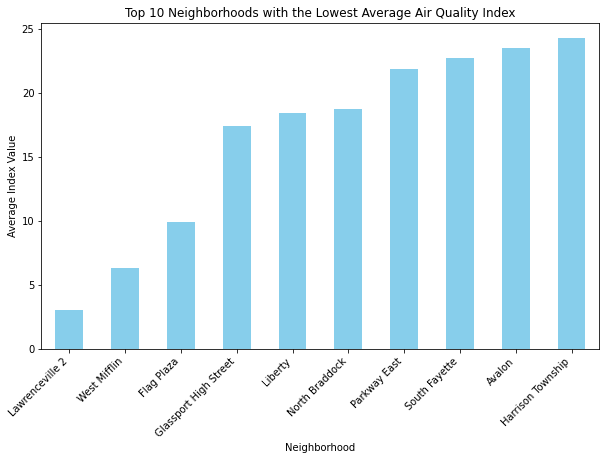

In [4]:
import pandas as pd
import matplotlib.pyplot as plt


df = pd.read_csv("AirQuality.csv")
df['date'] = pd.to_datetime(df['date'])


filtered_df = df[df['date'].dt.year == 2023]


neighborhood_avg_index = df.groupby('site')['index_value'].mean()

# Select the 10 neighborhoods with the lowest average index value
top_10_neighborhoods = neighborhood_avg_index.nsmallest(10)

# Plot the bar graph
plt.figure(figsize=(10, 6))
top_10_neighborhoods.plot(kind='bar', color='skyblue')
plt.title('Top 10 Neighborhoods with the Lowest Average Air Quality Index')
plt.xlabel('Neighborhood')
plt.ylabel('Average Index Value')
plt.xticks(rotation=45, ha='right')
plt.show()

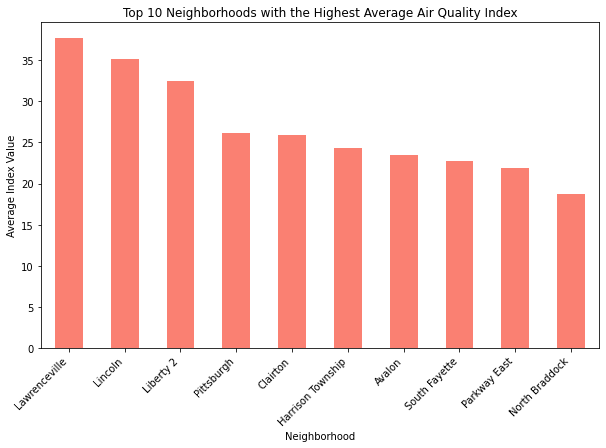

In [5]:
import pandas as pd
import matplotlib.pyplot as plt


df = pd.read_csv("AirQuality.csv")
df['date'] = pd.to_datetime(df['date'])
filtered_df = df[df['date'].dt.year == 2023]
# Group by neighborhood and calculate the average index value
neighborhood_avg_index = df.groupby('site')['index_value'].mean()

# Select the 10 neighborhoods with the highest average index value
top_10_neighborhoods = neighborhood_avg_index.nlargest(10)

# Plot the bar graph
plt.figure(figsize=(10, 6))
top_10_neighborhoods.plot(kind='bar', color='salmon')
plt.title('Top 10 Neighborhoods with the Highest Average Air Quality Index')
plt.xlabel('Neighborhood')
plt.ylabel('Average Index Value')
plt.xticks(rotation=45, ha='right')
plt.show()

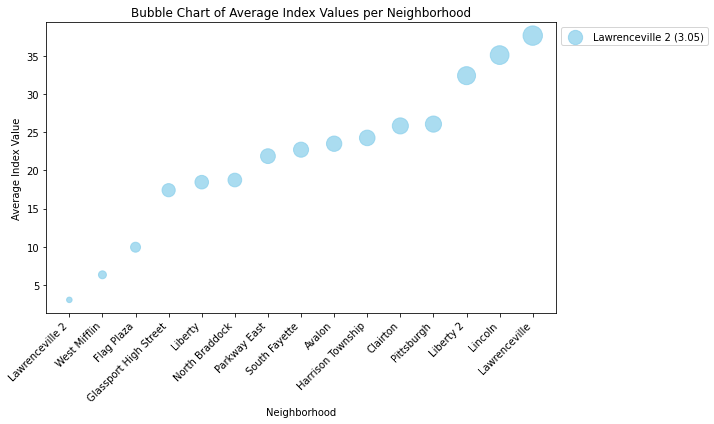

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("AirQuality.csv")

# Group by neighborhood and calculate the average index value
neighborhood_avg = df.groupby('site')['index_value'].mean().reset_index()

# Sort DataFrame by average index value for better visualization
neighborhood_avg.sort_values(by='index_value', inplace=True)

# Create a bubble chart
fig, ax = plt.subplots(figsize=(10, 6))
scatter = ax.scatter(neighborhood_avg['site'], neighborhood_avg['index_value'], s=neighborhood_avg['index_value']*10, c='skyblue', alpha=0.7)

# Add labels and title
ax.set_xlabel('Neighborhood')
ax.set_ylabel('Average Index Value')
ax.set_title('Bubble Chart of Average Index Values per Neighborhood')

# Add a legend
legend_labels = [f"{site} ({value:.2f})" for site, value in zip(neighborhood_avg['site'], neighborhood_avg['index_value'])]
ax.legend(handles=[scatter], labels=legend_labels, loc='upper left', bbox_to_anchor=(1, 1))

plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

### Pittsburgh Parks

Based on this dataset, the largest park in Pittsburgh is Frick park, at over 1,000 acres. Due to the size of this park, if we were to build a new one, it would be in a different neighborhood. The best place to build a park based on the map, would be either north, or west of Schenley Park due to the size of the parks, and the consistancy of them.

The best place to build a park based on the current parks, would be Shadyside.


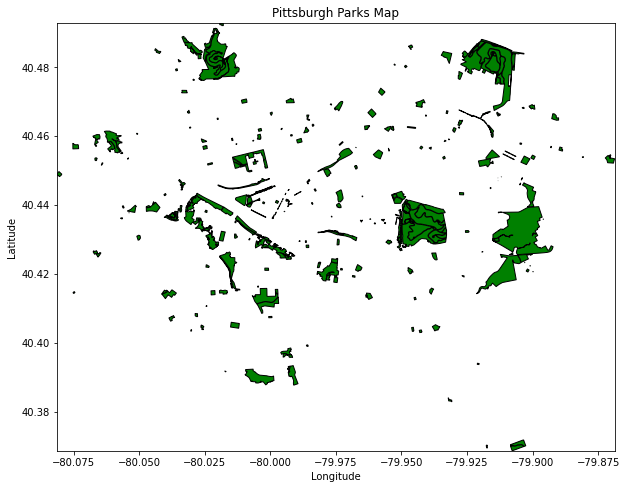

In [10]:
import geopandas as gpd
import matplotlib.pyplot as plt


parks_shapefile = gpd.read_file('Pittsburgh_Parks.shp')


fig, ax = plt.subplots(figsize=(10, 10))
parks_shapefile.plot(ax=ax, color='green', edgecolor='black')


ax.set_xlim(parks_shapefile.total_bounds[0], parks_shapefile.total_bounds[2])
ax.set_ylim(parks_shapefile.total_bounds[1], parks_shapefile.total_bounds[3])


ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.set_title('Pittsburgh Parks Map')

plt.show()


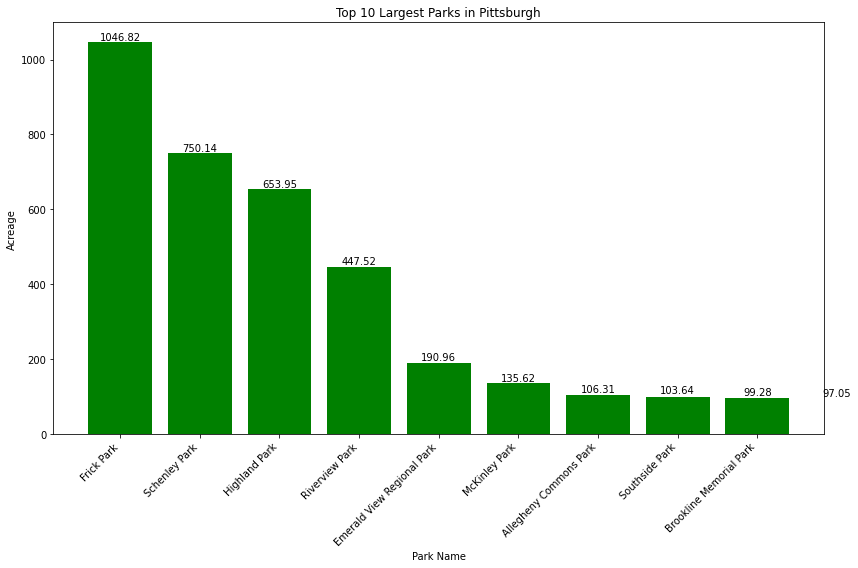

In [17]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the CSV file
parks_data = pd.read_csv('Pittsburgh_Parks.csv')

# Sort the DataFrame by acreage in descending order and select the top 10
top_10_parks = parks_data.sort_values(by='acreage', ascending=False).head(10)

# Create a bar graph
plt.figure(figsize=(12, 8))
plt.bar(top_10_parks['alterntnam'], top_10_parks['acreage'], color='green')
plt.xlabel('Park Name')
plt.ylabel('Acreage')
plt.title('Top 10 Largest Parks in Pittsburgh')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability

# Display the acreage values on top of the bars
for i, value in enumerate(top_10_parks['acreage']):
    plt.text(i, value + 0.1, f'{value:.2f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

## Arrest Records

When looking to build a new park in a neighborhood in Pittsburgh, one important factor is the crime rate in each area. This dataset that has been selected shows a detailed amount of arrests in each neighborhood throughout the city. It includes a dataset of 65,0000 arrests dating from 2016 to 2023.

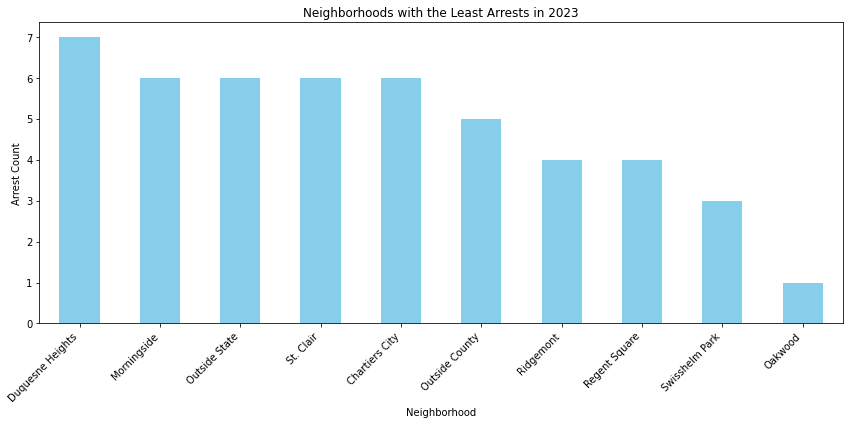

In [1]:
import pandas as pd
import matplotlib.pyplot as plt


df = pd.read_csv("ArrestData.csv")
df['ARRESTTIME'] = pd.to_datetime(df['ARRESTTIME'])


filtered_df = df[df['ARRESTTIME'].dt.year == 2023]


neighborhood_counts = filtered_df['INCIDENTNEIGHBORHOOD'].value_counts()


bottom_10_neighborhoods = neighborhood_counts.tail(10)


plt.figure(figsize=(12, 6))
bottom_10_neighborhoods.plot(kind='bar', color='skyblue')
plt.title('Neighborhoods with the Least Arrests in 2023')
plt.xlabel('Neighborhood')
plt.ylabel('Arrest Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

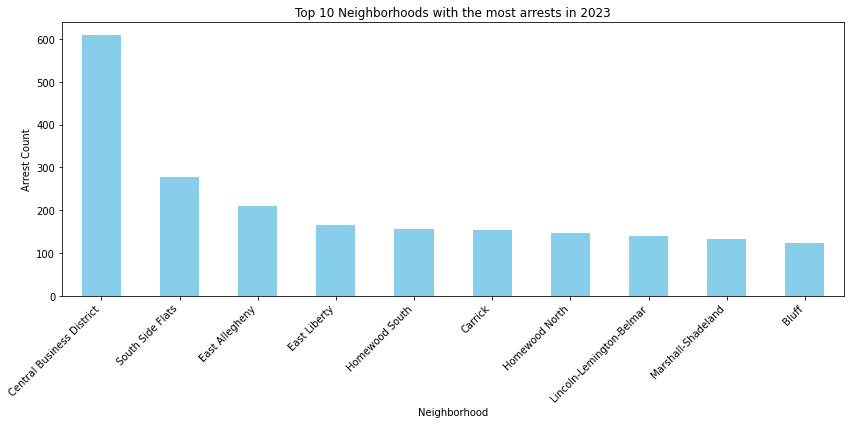

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


df = pd.read_csv("ArrestData.csv")
df['ARRESTTIME'] = pd.to_datetime(df['ARRESTTIME'])


filtered_df = df[df['ARRESTTIME'].dt.year == 2023]


neighborhood_counts = filtered_df['INCIDENTNEIGHBORHOOD'].value_counts()


top_10_neighborhoods = neighborhood_counts.head(10)


plt.figure(figsize=(12, 6))
top_10_neighborhoods.plot(kind='bar', color='skyblue')
plt.title('Top 10 Neighborhoods with the most arrests in 2023')
plt.xlabel('Neighborhood')
plt.ylabel('Arrest Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

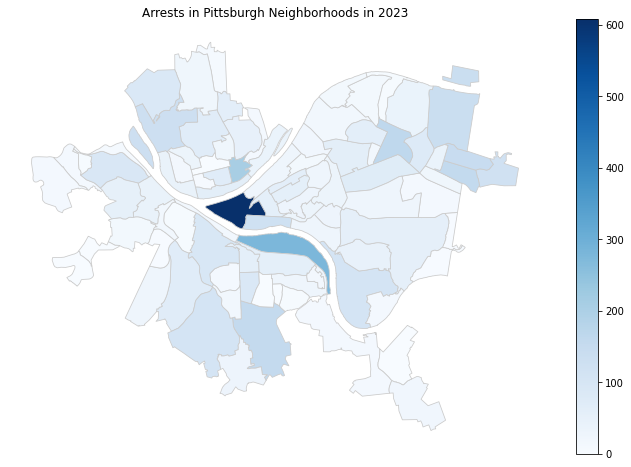

In [3]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt


shapefile_path = 'City_of_Pittsburgh_Neighborhoods.shp'


neighborhoods_gdf = gpd.read_file(shapefile_path)



arrest_data = pd.read_csv("ArrestData.csv")
arrest_data['ARRESTTIME'] = pd.to_datetime(arrest_data['ARRESTTIME'])


arrests_2023 = arrest_data[arrest_data['ARRESTTIME'].dt.year == 2023]


neighborhood_counts = arrests_2023['INCIDENTNEIGHBORHOOD'].value_counts().reset_index()
neighborhood_counts.columns = ['INCIDENTNEIGHBORHOOD', 'Arrest Count']


neighborhoods_gdf = pd.merge(neighborhoods_gdf, neighborhood_counts, how='outer', left_on='HOOD', right_on='INCIDENTNEIGHBORHOOD')


neighborhoods_gdf['Arrest Count'] = neighborhoods_gdf['Arrest Count'].fillna(0)


fig, ax = plt.subplots(1, 1, figsize=(12, 8))
neighborhoods_gdf.plot(column='Arrest Count', cmap='Blues', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)
ax.set_title('Arrests in Pittsburgh Neighborhoods in 2023')
ax.set_axis_off()

plt.show()

After taking a look at this data, we can see the top ten neighborhoods with the highest arrest rate in 2023, and the top ten neighborhoods with the lowest arrest rate in 2023, along with a map accompanying it. These arrests can range from possession of marijuana to terroristic threats, most are at the felony level. When looking to build a new park, the best neighborhood is not going to have a high volume of arrests. From the results pulled, the neighborhood with the least amount of arrests in 2023 is Oakwood. This neighborhood is located just a couple of neighborhoods West of Downtown, which has the highest arrest rate.

## The Best Neighborhood

Based off all of our data, the best place to build an entirely new park would be Shadyside. Considering it was the winner for off of location, and although we didn't name the runner-ups on a lot of the metrics, Shadyside by itself is almost clear of all of the other places. Also it's a rich neighborhood too, so take that how you will. Looking at our data, Shadyside does not have a high air quality index, it has a lack of parks in it, and there are a low volume of arrests in the area.
## Conclusion

To be fair, Shadyside does have a lot of qualities that would help in building a park in itself, with the funds that would help in the park, the arrest data is great the location couldn't be more better. Shadyside is actually a great place to live, and a lot of people have great reviews about living in Shadyside, I'm sure the kids can't complain. The data was unhelpful were the parks in the city, as when you expect to look something up, you obviously don't want to look another thing up in hopes for an answer from the previous search. It was just a whole thing and it wasn't good. It was pandamonium. Obviously there are more factors that should be taken in account when building a park such as, children in the area, funding, safety, crime rate in general, amongst others. I would've wanted to see what places actually didn't have parks so we didn't have to inquire further about it. It's cool to see how pandas can help you put whole datasets in without well having to type the whole data set.
